# Package Import and Data Loading

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from ripser import ripser
import persim
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix
from scipy.sparse import load_npz
import gudhi as gd
from igraph import Graph
from IPython.display import SVG, display
import matplotlib.pyplot as plt

In [3]:
ppi_df = pd.read_table("../../data/Gavin_PPI_Network.txt", header=0)
ppi_df.columns = ["ProteinA", "ProteinB"]
ppi_df.head()

,ProteinA,ProteinB
0,YBR119W,YML046W
1,YBR119W,YKL012W
2,YBR119W,YDR235W
3,YBR119W,YIL061C
4,YBR119W,YDR240C


In [4]:
complexes_list = []
with open("../../data/Gavin_Original_Communities.txt") as complexes:
  for line in complexes:
    line = line.strip()
    temp_list = list(line.split("\t"))
    complexes_list.append(temp_list)

print(complexes_list)

[['YAL001C YBR123C YDR362C YGR047C YOR110W YPL007C'], ['YAL002W YDL077C YDR080W YLR148W YLR396C YMR231W YPL045W'], ['YAL007C YAR002C-A YDL018C YGL200C YHR110W YKL192C YML012W'], ['YAL013W YBR095C YDL076C YIL084C YMR075W YMR263W YNL097C YNL330C YOL004W YPL139C YPL181W YPR023C'], ['YAL014C YDR264C YHR005C YMR197C YOR036W YOR212W'], ['YAL016W YDL134C YDL188C YGL190C YGR161C YML109W YMR273C YOR014W'], ['YAL017W YBR001C YDR001C YDR099W YER177W YGL252C YNL267W'], ['YAL029C YBR109C YBR130C YGL106W YHR023W YKL130C YLR429W YMR109W YOR326W'], ['YAL032C YBR065C YCR063W YDL209C YDR364C YDR416W YGL120C YGL128C YGR278W YHR156C YJR050W YLL036C YLR117C YLR424W YMR213W YPL151C YPR101W'], ['YAL033W YBL018C YBR167C YBR257W YDR478W YGR030C YHR062C YNL221C YNL282W'], ['YAL035W YBR079C YDR091C YDR429C YLR192C YMR146C YMR309C YNL244C YOR361C YPR041W'], ['YAL038W YBR118W YBR127C YDL055C YDL229W YFL037W YJL130C YLL024C YML085C YPR080W'], ['YAL043C YDR195W YDR301W YER133W YGR156W YJR093C YKL018W YKL059C YKR002W

In [5]:
gavin_protein_net = nx.from_pandas_edgelist(
    ppi_df,
    source='ProteinA',
    target='ProteinB'
)

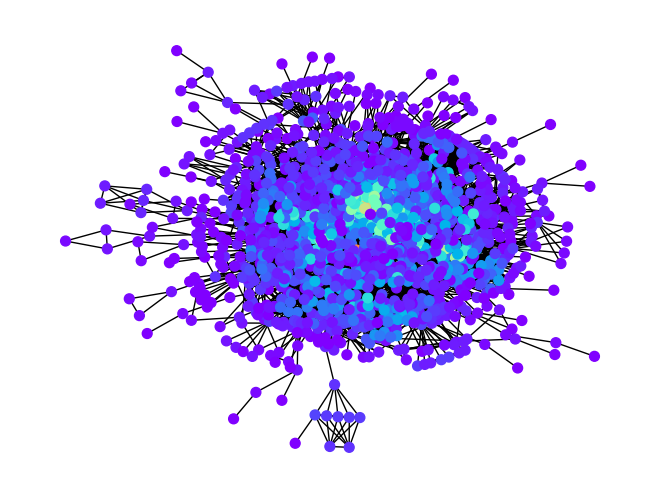

In [13]:
scaled_degree = [d[1]*50 for d in nx.degree(gavin_protein_net)]
nx.draw_kamada_kawai(gavin_protein_net,
        # Weights Based on Column
        width=list(nx.get_edge_attributes(gavin_protein_net, 'SemSim').values()),
        # Node size based on degree
        node_size=50,
        # Colour Based on Degree
        node_color=scaled_degree,
        # Set color map to determine colours
        cmap='rainbow',
        with_labels=False)

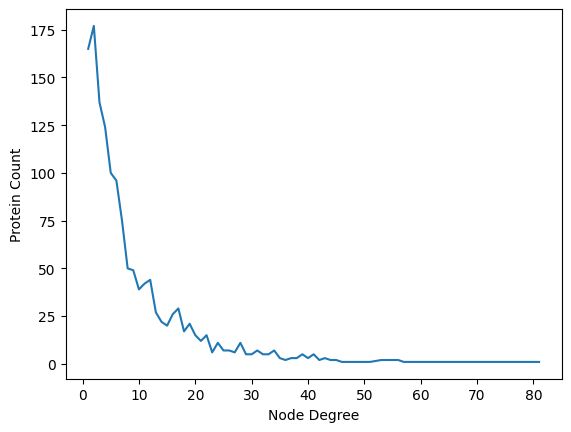

In [6]:
## Node Degree Viualization
## The following is just to check the distribution of the node degrees. As it seems like there are highly central nodes
degree_nodes = {}
for p, d in gavin_protein_net.degree():
  degree_nodes[p] = d

## This gives that there are nodes with degree > 900
sorted_node_degrees = dict(sorted(degree_nodes.items(), key=lambda item: item[1],  reverse=True))

## Let's visualize the distribution
viz_degree = {degree: 0 for degree in degree_nodes.values()}
for degree in degree_nodes.values():
  viz_degree[degree]+=1
degree_count_pairs = sorted(viz_degree.items())
x, y = zip(*degree_count_pairs) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Node Degree')
plt.ylabel('Protein Count')
plt.show()

In [14]:
gavin_dist_mat = np.array(nx.floyd_warshall_numpy(gavin_protein_net))

In [16]:
gaving_dist_diags = ripser(gavin_dist_mat, distance_matrix=True)['dgms']

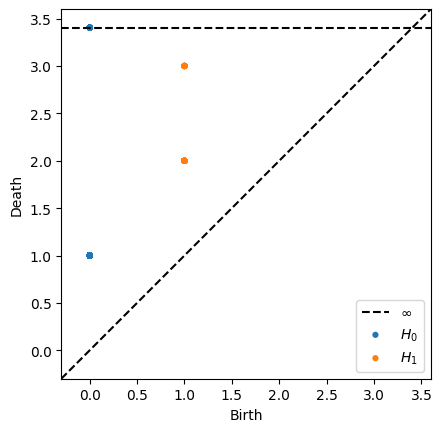

In [17]:
persim.plot_diagrams(gaving_dist_diags)